In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## Load and Check Data

In [24]:
# Read data
df = pd.read_csv("C:/Users/Ahmet/Desktop/Jupyter/Proje/Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Let's look from surface to our data with info() method. We can see what are our variables' types and if there is null data.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can quickly reach some statistical information with describe method() like mean, std, first and second quartile medians so on.

In [26]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [27]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

We have 12 columns in this data set. We will check which columns means what in variable description section. Let's continue!

## Dataset Description

Variable Description
The dataset used for model building contained 10999 observations of 12 variables. The data contains the following information:

ID: ID Number of Customers.
Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
Cost of the product: Cost of the Product in US Dollars.
Prior purchases: The Number of Prior Purchase.
Product importance: The company has categorized the product in the various parameter such as low, medium, high.
Gender: Male and Female.
Discount offered: Discount offered on that specific product.
Weight in gms: It is the weight in grams.
Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

## Univaraite Variable Analysis
Categorical variable: Warehouse block, Customer rating, Mode of shipment, Product importance, Gender, Reached on time(Target Value)
Numerical Variable: ID, Customer care calls, Cost of the product, Prior purchases, Discount offered, Weight in gms
We have 6 categorical variable and 6 numerical variable.

## Categorical Variable Analysis

In [29]:
def categorical_vis(variable):
    
    var = df[variable].value_counts()
    
    x = var.index
    y = var
    if variable == "Reached.on.Time_Y.N":
        plt.bar(x,y,edgecolor="#1F1F1F",color='#636363')
        plt.title(variable,fontsize=12,fontweight="bold",color="#1F1F1F")
        plt.ylabel("Frequency")
        plt.xticks([0,1])
        plt.show()
        print("{}: \n {}".format(variable,var))
    else:
        plt.bar(x,y,edgecolor="#1F1F1F",color='#636363')
        plt.title(variable,fontsize=12,fontweight="bold",color="#1F1F1F")
        plt.ylabel("Frequency")
        plt.show()
        print("{}: \n {}".format(variable,var))

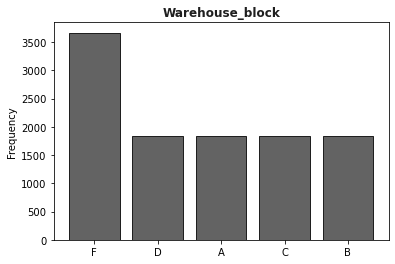

Warehouse_block: 
 F    3666
D    1834
A    1833
C    1833
B    1833
Name: Warehouse_block, dtype: int64


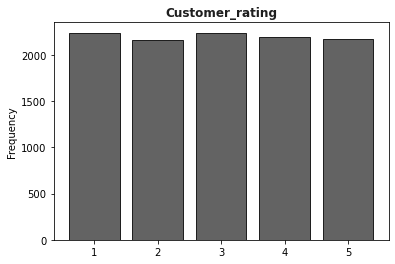

Customer_rating: 
 3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64


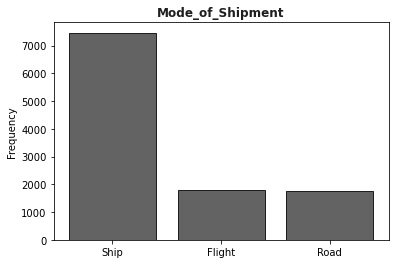

Mode_of_Shipment: 
 Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64


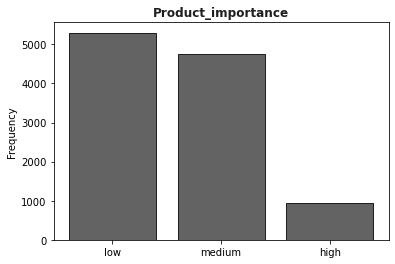

Product_importance: 
 low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64


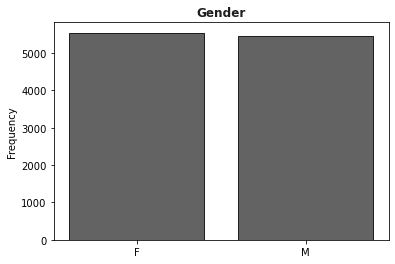

Gender: 
 F    5545
M    5454
Name: Gender, dtype: int64


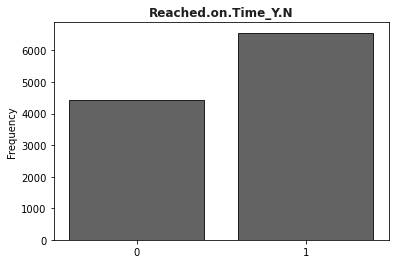

Reached.on.Time_Y.N: 
 1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64


In [30]:
categorical = ["Warehouse_block","Customer_rating","Mode_of_Shipment","Product_importance","Gender","Reached.on.Time_Y.N"]
for cat in categorical:
    categorical_vis(cat)

We can see that most of our shipments is not on time (on time: 4436, not on time: 6563). In mode of shipment, ship is dominating that category so we can interpret this probably most of our not on time shipment is coming from "ship" because they are slower than other methods.

## Numerical Variable Analysis

In [31]:
def numerical_vis(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable],bins=50,color='#636363')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable),fontsize=12,fontweight="bold",color="#1F1F1F")
    plt.show()

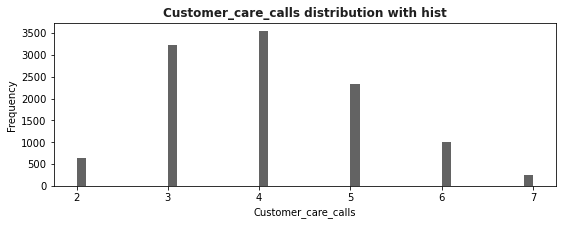

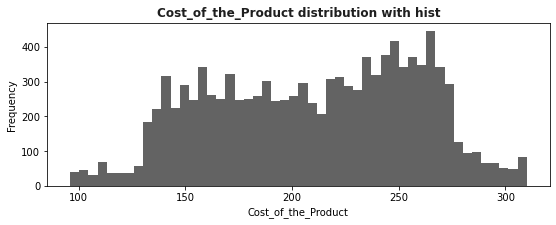

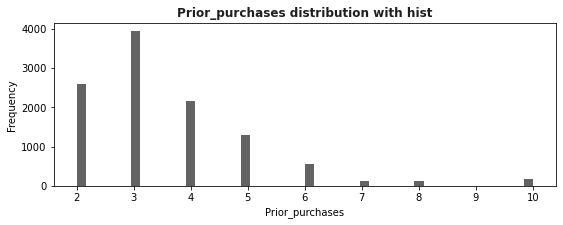

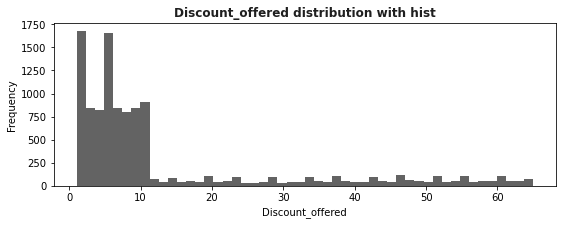

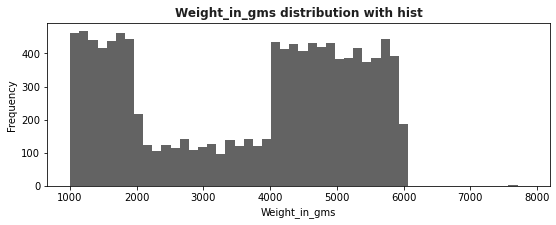

In [32]:
numerical = ["Customer_care_calls","Cost_of_the_Product","Prior_purchases","Discount_offered","Weight_in_gms"]
for num in numerical:
    numerical_vis(num)

## Basic Data Analysis

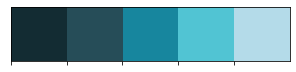

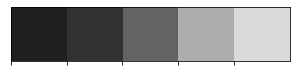

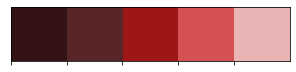

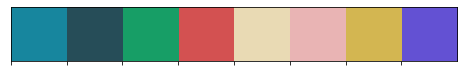

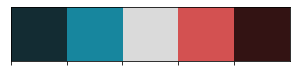

In [33]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']
sns.set_palette("mako")

sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

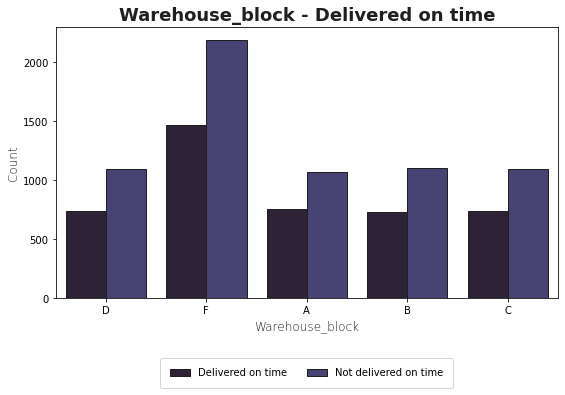

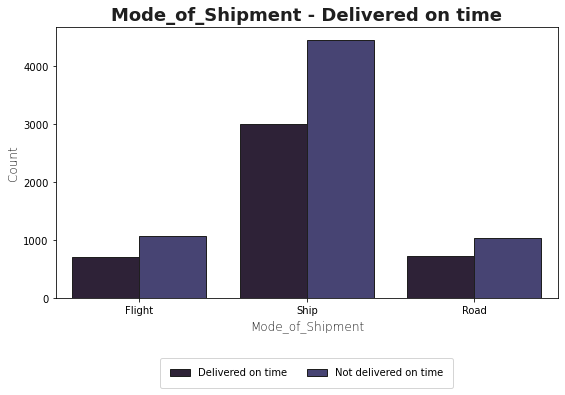

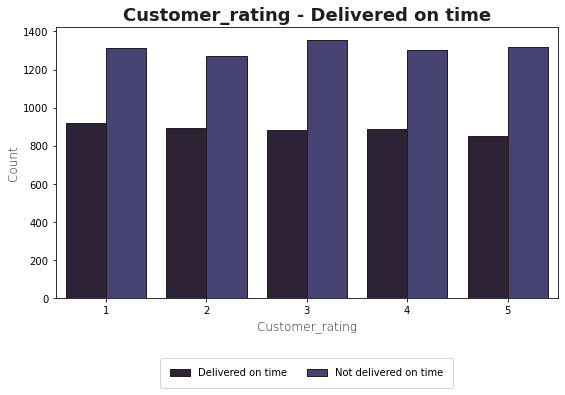

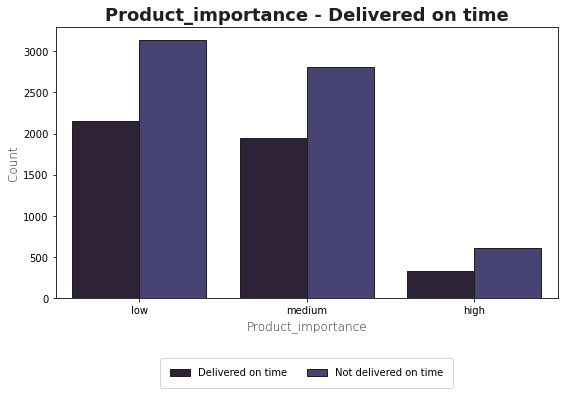

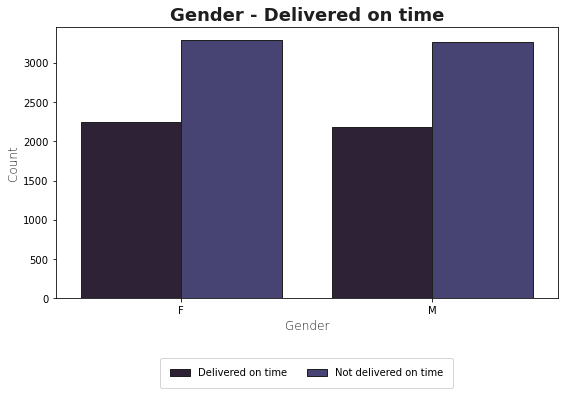

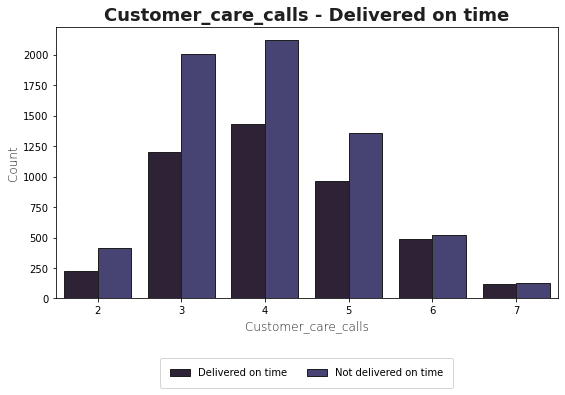

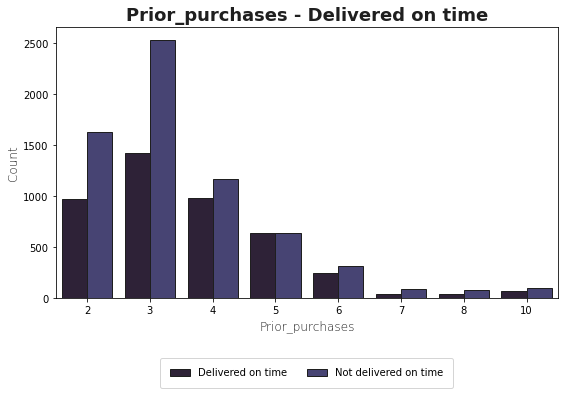

In [34]:
features = ["Warehouse_block","Mode_of_Shipment","Customer_rating","Product_importance","Gender","Customer_care_calls","Prior_purchases"]

for f in features:
    fig, ax = plt.subplots(figsize=(9, 5))
    sns.countplot(x=f,data=df,hue="Reached.on.Time_Y.N",edgecolor=colors_dark[0])
    ax.legend(["Delivered on time","Not delivered on time"],loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderpad=1, frameon=True, fontsize=10)
    plt.ylabel("Count",fontsize=12, fontweight='light', color=colors_dark[0])
    plt.xlabel(f"{f}",fontsize=12, fontweight='light', color=colors_dark[0])
    plt.title("{} - Delivered on time".format(f), fontsize=18, fontweight='bold', color=colors_dark[0])
    plt.show()

- Customer who had 6 or 7 times customer care calls has more delivery on time probability.
- Customer who had 4-6 times prior purchases has more delivery on time probability.

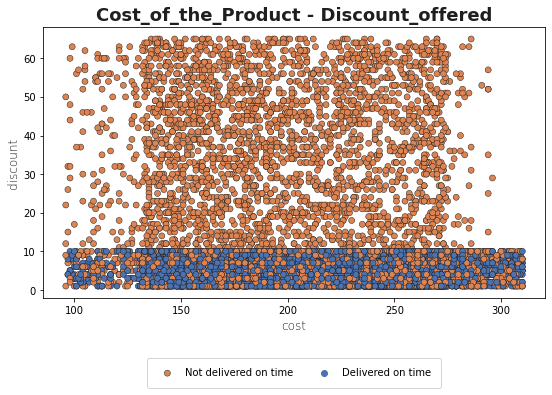

In [35]:
fig, ax = plt.subplots(figsize=(9,5))
sns.scatterplot(x="Cost_of_the_Product",y="Discount_offered",hue="Reached.on.Time_Y.N",data=df,edgecolor=colors_dark[0],palette="deep")
ax.legend(["Not delivered on time","Delivered on time"],loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderpad=1, frameon=True, fontsize=10)
plt.ylabel("discount",fontsize=12, fontweight='light', color=colors_dark[0])
plt.xlabel("cost",fontsize=12, fontweight='light', color=colors_dark[0])
plt.title("Cost_of_the_Product - Discount_offered", fontsize=18, fontweight='bold', color=colors_dark[0])
plt.show()

Customers who received a discount of more than 10 dollars did not receive on time delivery. This feature will be important for us to prediction.

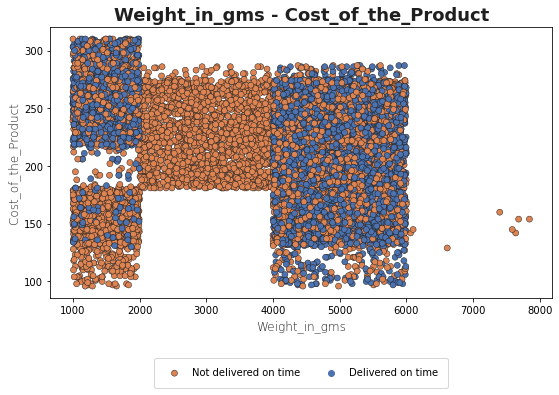

In [36]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.scatterplot(x="Weight_in_gms",y="Cost_of_the_Product",hue="Reached.on.Time_Y.N",data=df,edgecolor=colors_dark[0],palette="deep")
ax.legend(["Not delivered on time","Delivered on time"],loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderpad=1, frameon=True, fontsize=10)
plt.ylabel("Cost_of_the_Product",fontsize=12, fontweight='light', color=colors_dark[0])
plt.xlabel("Weight_in_gms",fontsize=12, fontweight='light', color=colors_dark[0])
plt.title("Weight_in_gms - Cost_of_the_Product", fontsize=18, fontweight='bold', color=colors_dark[0])
plt.show()

- 2000 - 4000 and 6000+ gram products are not delivered on time every time.
- Delivered on time products' weights changing between 1000-2000 and 4000-6000 grams.

In [37]:
rate_mean = []
avg = df["Customer_rating"].mean()
for i in range(2,8):
    rate_mean.append(float(df[df["Customer_care_calls"]==i]["Customer_rating"].mean()))
    
calls=df.Customer_care_calls.sort_values(ascending=True).unique()

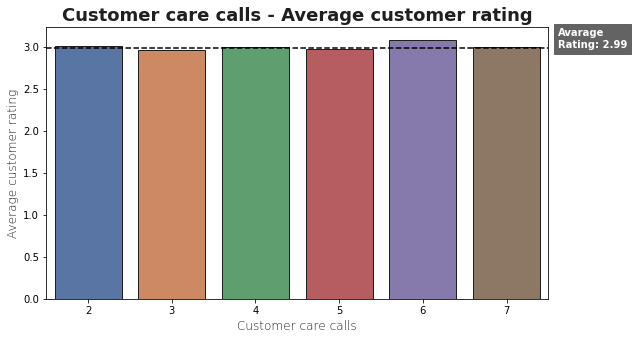

In [38]:
df[df["Customer_care_calls"]==i]["Customer_rating"].mean()
fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(x=calls,y=rate_mean,edgecolor=colors_dark[0],palette="deep")
ax.axhline(avg, linestyle='--', color="black")
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.text(
    s="Avarage\nRating: {:.2f}".format(avg),
    x=xmax*1.02,
    y=avg,
    backgroundcolor=colors_dark[2],
    fontsize=10,
    fontweight='bold',
    color='white'
)
plt.ylabel("Average customer rating",fontsize=12, fontweight='light', color=colors_dark[0])
plt.xlabel("Customer care calls",fontsize=12, fontweight='light', color=colors_dark[0])
plt.title("Customer care calls - Average customer rating", fontsize=18, fontweight='bold', color=colors_dark[0])
plt.show()

There is no meaningful difference between them. As you can see, we are not getting better rating score if we call our customer more.

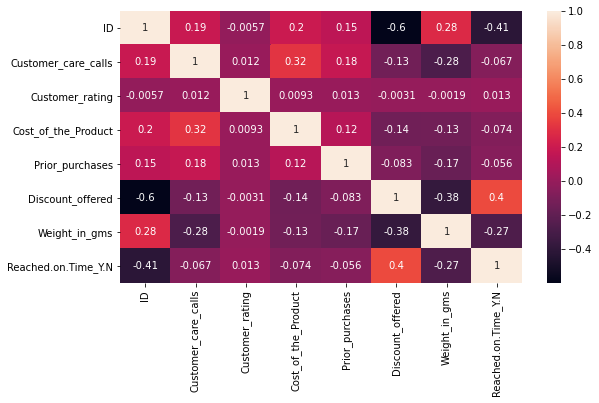

In [40]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True);

- Correllation matrix shows relationships among features. We interpreted that if we give more than 10 dollar discount to our customer, this order probably will not be on time. As you can see there is a correalation between reached on time and discount offered. When discount offered is going up, reaching on time going down. That might be seems wrong to you but as you know 1: NOT reached on time, 0: Reached on time.
- Cost of product and customer care calls have more strong relationship compared to other relationships. That means if our costumer pays more money for product, they have tendecy to have more customer care callls.

## Outlier Detection

In this section, we will check if we have any outlier value and if we have, how we will handle with them.

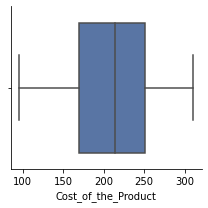

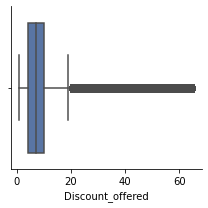

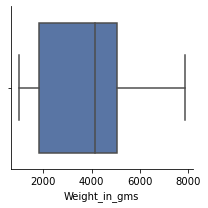

In [41]:
boxes = ["Cost_of_the_Product","Discount_offered","Weight_in_gms"]
for bx in boxes:
    g = sns.FacetGrid(df)
    g.map(sns.boxplot, bx,palette="deep")
    plt.show()

It seems like we have a lot of outliers for discount offered but we might have some outliers for other features as well. Let's find them with z_score!

## Z_score

I will use z_score to see how many outlier we have. Also we can use Tukey Method for it but I just used it in my previous project (Titanic EDA) so I will continue with z_score this time.

In [42]:
#import
from scipy.stats import zscore

for i in boxes:
    print(i)
    z_scores = zscore(df[i])
    print("*"*50)
    for threshold in np.arange(1.5,5,0.5):
        print("Treshold: {}".format(threshold))
        print("Amount of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
        print('------')

Cost_of_the_Product
**************************************************
Treshold: 1.5
Amount of Outliers: 454
------
Treshold: 2.0
Amount of Outliers: 66
------
Treshold: 2.5
Amount of Outliers: 0
------
Treshold: 3.0
Amount of Outliers: 0
------
Treshold: 3.5
Amount of Outliers: 0
------
Treshold: 4.0
Amount of Outliers: 0
------
Treshold: 4.5
Amount of Outliers: 0
------
Discount_offered
**************************************************
Treshold: 1.5
Amount of Outliers: 1382
------
Treshold: 2.0
Amount of Outliers: 999
------
Treshold: 2.5
Amount of Outliers: 584
------
Treshold: 3.0
Amount of Outliers: 181
------
Treshold: 3.5
Amount of Outliers: 0
------
Treshold: 4.0
Amount of Outliers: 0
------
Treshold: 4.5
Amount of Outliers: 0
------
Weight_in_gms
**************************************************
Treshold: 1.5
Amount of Outliers: 7
------
Treshold: 2.0
Amount of Outliers: 5
------
Treshold: 2.5
Amount of Outliers: 1
------
Treshold: 3.0
Amount of Outliers: 0
------
Treshold: 

As we thought, the most number of outliers in "discount_offered" column. I will use 2 method to handle with outliers; First, I will drop them from our data. Also, I will try to solve that problem with winsorize so we can compare at the end which data set giving better results for prediction.

## Dropping Outliers

In [54]:
for i in boxes:
    z_scores = zscore(df[i])
    print(z_scores)

[-0.69072171  0.12074558 -0.56588059 ...  0.66172378  0.26639356
 -1.14847249]
[ 1.88998336  2.81563557  2.13682395 ... -0.57842252 -0.70184282
 -0.45500223]
[-1.46823975 -0.33389333 -0.15900218 ... -1.51593733 -1.48230442
 -1.2199677 ]


In [55]:
for i in boxes:
    z_scores = zscore(df[i])
    df["z_scores_{}".format(i)] = z_scores
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,z_scores_Cost_of_the_Product,z_scores_Discount_offered,z_scores_Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,-0.690722,1.889983,-1.468240
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,0.120746,2.815636,-0.333893
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,-0.565881,2.136824,-0.159002
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,-0.711529,-0.208162,-1.502484
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,-0.545074,2.013404,-0.703244


In [56]:
indeces = df[(df["z_scores_Cost_of_the_Product"]>=2) | (df["z_scores_Discount_offered"]>=2) | (df["z_scores_Weight_in_gms"]>=2)].index.to_list()
cleaned_data = df

for i in indeces:
    cleaned_data = cleaned_data.drop(index=i,axis=0)

cleaned_data[(cleaned_data["z_scores_Cost_of_the_Product"]>=2) | (cleaned_data["z_scores_Discount_offered"]>=2) | (cleaned_data["z_scores_Weight_in_gms"]>=2)]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,z_scores_Cost_of_the_Product,z_scores_Discount_offered,z_scores_Weight_in_gms


I gave a new name to our data after drop outliers (cleaned_data). As you can see when we check if there is any row that has higher z_score than 2, we didn't get any so that means we got rid of them. Yuppi!

In [57]:
#Dropping z_score columns
df.drop(columns=["z_scores_Cost_of_the_Product","z_scores_Discount_offered","z_scores_Weight_in_gms"],axis=1,inplace=True)
cleaned_data.drop(columns=["z_scores_Cost_of_the_Product","z_scores_Discount_offered","z_scores_Weight_in_gms"],axis=1,inplace=True)

## Winsorization

I will make one sided winsorization because when we checked box plots that shows us we just have outliers at high values. I will winsorize them to 0.90. Let's start!

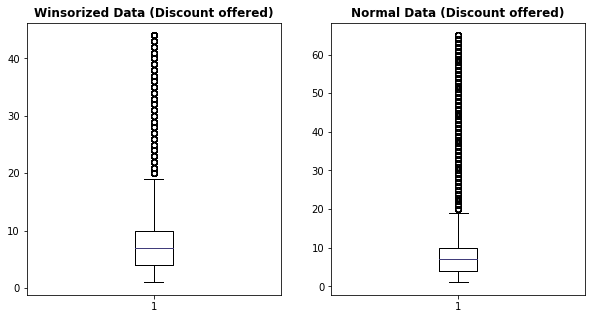

In [58]:
#import
from scipy.stats.mstats import winsorize

winsorized= winsorize(df["Discount_offered"],(0,0.10))

#Visualization
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(winsorized)
plt.title("Winsorized Data (Discount offered)",fontsize=12,fontweight="bold")
plt.subplot(1,2,2)
plt.boxplot(df["Discount_offered"].values)
plt.title("Normal Data (Discount offered)",fontsize=12,fontweight="bold")
plt.show()

Our outliers visibly decreased after winsorization. I will save them with new data frame which is will be called winsorized_data.

In [59]:
winsorized_data = df
winsorized_data["Discount_offered"] = winsorized
winsorized_data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,44,3088,1
2,3,A,Flight,2,2,183,4,low,M,44,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,44,2484,1


## Feature Engineering

In [60]:
# Feature extraction - Discount Rate
new = winsorized_data["Cost_of_the_Product"]/winsorized_data["Weight_in_gms"]
winsorized_data["discount_rate"] = new.values

In [61]:
#one hot encoding
cleaned_data = pd.get_dummies(cleaned_data, columns=["Warehouse_block","Mode_of_Shipment","Gender"])
#label encoding
cleaned_data["Product_importance"].replace({"low":0,"medium":1,"high":2},inplace=True)
cleaned_data["Reached.on.Time_Y.N"].replace({1:0,0:1},inplace=True)
#Drop ID column
cleaned_data.drop(columns=["ID"],axis=1,inplace=True)

#one hot encoding
winsorized_data = pd.get_dummies(winsorized_data, columns=["Warehouse_block","Mode_of_Shipment","Gender"])
#label encoding
winsorized_data["Product_importance"].replace({"low":0,"medium":1,"high":2},inplace=True)
winsorized_data["Reached.on.Time_Y.N"].replace({1:0,0:1},inplace=True)
#Drop ID column
winsorized_data.drop(columns=["ID"],axis=1,inplace=True)

winsorized_data.reset_index(drop=True,inplace=True)
cleaned_data.reset_index(drop=True,inplace=True)

I made one hot encdoing for categorical features and label encoding for "Product_importance" to prepare our data for prediction. Also, as you know for delivered on time 1 was indicating "NO", and 0 was "YES so that makes confisuon so I changed it as well. 0 is "NO" and 1 is "YES" from now on.

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

con_data= cleaned_data[["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"]]
con_data2= winsorized_data[["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"]]

X = StandardScaler().fit_transform(con_data)
X2 = StandardScaler().fit_transform(con_data2)

sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

sklearn_pca2 = PCA(n_components=2)
Y_sklearn2 = sklearn_pca2.fit_transform(X2)
print("Outliers Deleted Data")
print(sklearn_pca.explained_variance_ratio_)
print("Cumulative:")
value = 0
for i in sklearn_pca.explained_variance_ratio_:
    value += i
    print(value)

print("\n")
print("Winsorized Data")  
print(sklearn_pca2.explained_variance_ratio_)
print("Cumulative:")
value = 0
for i in sklearn_pca2.explained_variance_ratio_:
    value += i
    print(value)

Outliers Deleted Data
[0.39064276 0.3145339 ]
Cumulative:
0.39064276458780406
0.7051766656806461


Winsorized Data
[0.37517334 0.33991853]
Cumulative:
0.37517333651607204
0.7150918712928177


In [63]:
pca_new = pd.DataFrame(Y_sklearn,columns=["PC1","PC2"])
pca_new2 = pd.DataFrame(Y_sklearn2,columns=["PC1","PC2"])

clean_pca = pd.concat([cleaned_data,pca_new],axis=1)
clean_pca = clean_pca.drop(columns=["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"])

win_pca = pd.concat([winsorized_data,pca_new2],axis=1)
win_pca = win_pca.drop(columns=["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"])

I used PCA for each data set we have (cleaned and winsorized). I put columns which have continous variables so we just have 4 column like this. I will convert these 4 column to 2 column. So now, we are ready for prediction. Are you excited about results? LET'S GO!!

## Prediction

I will use 3 algorithms such as RandomForestClassifier, KNN, GradientBoostingClassifier for our 4 data set and will compare them each other.

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#non-pca and outliers deleted data
non_cl_y = cleaned_data["Reached.on.Time_Y.N"]
non_cl_X = cleaned_data.drop(["Reached.on.Time_Y.N"],axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(non_cl_X,non_cl_y,test_size=0.33,random_state=123)

#non-pca and winsorized data
non_win_y = winsorized_data["Reached.on.Time_Y.N"]
non_win_X = winsorized_data.drop(["Reached.on.Time_Y.N"],axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(non_win_X,non_win_y,test_size=0.33,random_state=123)

#pca and outliers deleted data
cl_y = clean_pca["Reached.on.Time_Y.N"]
cl_X = clean_pca.drop(["Reached.on.Time_Y.N"],axis=1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(cl_X,cl_y,test_size=0.33,random_state=123)

#pca and winsorized data
win_y = win_pca["Reached.on.Time_Y.N"]
win_X = win_pca.drop(["Reached.on.Time_Y.N"],axis=1)

X_train4, X_test4, y_train4, y_test4 = train_test_split(win_X,win_y,test_size=0.33,random_state=123)

In [66]:
rf= RandomForestClassifier(max_depth = 7,min_samples_leaf=1,min_samples_split=4,criterion="entropy",random_state=123)

print("non-pca and outliers deleted data")
rf.fit(X_train1,y_train1)
y_pred1 = rf.predict(X_test1)

print(confusion_matrix(y_test1,y_pred1))
print(accuracy_score(y_test1,y_pred1))
print("*"*30)

print("non-pca and winsorized data")
rf.fit(X_train2,y_train2)
y_pred2 = rf.predict(X_test2)

print(confusion_matrix(y_test2,y_pred2))
print(accuracy_score(y_test2,y_pred2))
print("*"*30)

print("pca and outliers deleted data")
rf.fit(X_train3,y_train3)
y_pred3 = rf.predict(X_test3)

print(confusion_matrix(y_test3,y_pred3))
print(accuracy_score(y_test3,y_pred3))
print("*"*30)

print("pca and winsorized data")
rf.fit(X_train4,y_train4)
y_pred4 = rf.predict(X_test4)

print(confusion_matrix(y_test4,y_pred4))
print(accuracy_score(y_test4,y_pred4))

non-pca and outliers deleted data
[[ 814 1014]
 [ 131 1318]]
0.6505950564540739
******************************
non-pca and winsorized data
[[1181  982]
 [ 128 1339]]
0.6942148760330579
******************************
pca and outliers deleted data
[[ 982  846]
 [ 393 1056]]
0.621910283796155
******************************
pca and winsorized data
[[1263  900]
 [ 290 1177]]
0.6721763085399449


In [67]:
knn= KNeighborsClassifier(n_neighbors=5)

print("non-pca and outliers deleted data")
knn.fit(X_train1,y_train1)
y_pred1 = knn.predict(X_test1)

print(confusion_matrix(y_test1,y_pred1))
print(accuracy_score(y_test1,y_pred1))
print("*"*30)

print("non-pca and winsorized data")
knn.fit(X_train2,y_train2)
y_pred2 = knn.predict(X_test2)

print(confusion_matrix(y_test2,y_pred2))
print(accuracy_score(y_test2,y_pred2))
print("*"*30)

print("pca and outliers deleted data")
knn.fit(X_train3,y_train3)
y_pred3 = knn.predict(X_test3)

print(confusion_matrix(y_test3,y_pred3))
print(accuracy_score(y_test3,y_pred3))
print("*"*30)

print("pca and winsorized data")
knn.fit(X_train4,y_train4)
y_pred4 = knn.predict(X_test4)

print(confusion_matrix(y_test4,y_pred4))
print(accuracy_score(y_test4,y_pred4))

non-pca and outliers deleted data
[[1138  690]
 [ 570  879]]
0.6155019835215135
******************************
non-pca and winsorized data
[[1483  680]
 [ 579  888]]
0.653168044077135
******************************
pca and outliers deleted data
[[1129  699]
 [ 604  845]]
0.6023802258162954
******************************
pca and winsorized data
[[1472  691]
 [ 609  858]]
0.6418732782369146


In [68]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(loss="exponential",n_estimators=90,criterion="mse",random_state=123, )

print("non-pca and outliers deleted data")
GBC.fit(X_train1,y_train1)
y_pred1 = GBC.predict(X_test1)

print(confusion_matrix(y_test1,y_pred1))
print(accuracy_score(y_test1,y_pred1))
print("*"*30)

print("non-pca and winsorized data")
GBC.fit(X_train2,y_train2)
y_pred2 = GBC.predict(X_test2)

print(confusion_matrix(y_test2,y_pred2))
print(accuracy_score(y_test2,y_pred2))
print("*"*30)

print("pca and outliers deleted data")
GBC.fit(X_train3,y_train3)
y_pred3 = GBC.predict(X_test3)

print(confusion_matrix(y_test3,y_pred3))
print(accuracy_score(y_test3,y_pred3))
print("*"*30)

print("pca and winsorized data")
GBC.fit(X_train4,y_train4)
y_pred4 = GBC.predict(X_test4)

print(confusion_matrix(y_test4,y_pred4))
print(accuracy_score(y_test4,y_pred4))

non-pca and outliers deleted data
[[ 848  980]
 [ 147 1302]]
0.6560878852609093
******************************
non-pca and winsorized data
[[1256  907]
 [ 209 1258]]
0.6925619834710743
******************************
pca and outliers deleted data
[[ 936  892]
 [ 315 1134]]
0.6316753127860848
******************************
pca and winsorized data
[[1247  916]
 [ 281 1186]]
0.6702479338842975


We got better scores with random forest and gradien boosting for "non-pca and winsorized data". As you can see, we just lost about %1 percent of accuracy with PCA. I will continue with random forest and "non-pca and winsorized data" because it gave us better accuracy and precision score. I will try to improve it with hyperparameter tuning.

## Hyperparamter Tuning - GridSearch CV

In [69]:
rf.get_params()
params = {"max_depth":[x for x in range (3,15)],
         "min_samples_split":[x for x in range (2,5)],
         "min_samples_leaf":[x for x in range (1,3)],
         }

In [70]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=rf,
                       param_grid = params,
                       cv = 10
                      )
grid_cv.fit(non_win_X, non_win_y)

print("Best Parameters : ", grid_cv.best_params_)

Best Parameters :  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4}


## Conclusion

I made 4 data set which is outliers cleaned, winsorized and pca version both of them. When we check result better accuracy and precision scores came with RandomForest and non-pca winsorized data. I found best parameters for RandomForest with hyperparamter tuning method - GridSearchCV. So as a result, we approximately got 69.5 accuracy score with no-pca winsorized data and RandomForestClassifier.